## San Francisco Crime Classification <Level 1> 과제

![sf crime](http://drive.google.com/uc?export=view&id=1WxNezzSSmypLqQfPd-bLajr09qvmjAHF)

### 머신러닝 알고리즘을 활용하여 샌프란시스코에서 발생한 범죄의 종류를 예측하기

(이 주피터 노트북은 다음의 링크 [https://bit.ly/dslive-0101](https://bit.ly/dslive-0101) 에서 다운받을 수 있습니다. 제출 안내는 파일의 마지막 부분에 안내되어 있습니다.


----
이번에 우리가 참여할 경진대회는 캐글의 [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 입니다.

[SF OpenData](https://datasf.org/opendata/)에서는 샌프란시스코 도시에 대한 다양한 정보(부동산, 에너지, 교통, 헬스케어 등)를 공개하고 있습니다. 이 중에서, 우리는 2003년부터 2015년도까지 샌프란시스코에서 발생한 범죄 데이터를 확보합니다. 이 데이터를 활용해, 우리는 특정 위치와 특정 시간에 발생한 범죄의 구체적인 종류(ex: 절도, 살인, 뺑소니 등)를 맞추는 경진대회에 참여할 것입니다. 이번 경진대회에서 우리가 배우고자 하는 내용은 다음과 같습니다.

**1. 좌표와 주소 데이터를 다루는 법을 배울 수 있습니다.**

범죄를 예측하는데 가장 중요한 정보는 범죄가 발생한 위치입니다. 이번 경진대회에는 범죄가 일어난 구체적인 위치를 1) 좌표(위도, 경도)와 2) 주소(ex: 1100 Block of MARKET ST)로 표현합니다. 이러한 장소 데이터를 어떻게 분석하고 활용할 수 있는지를 배울 수 있습니다.

**2. 예측 모델의 성능을 평가할 때, 범죄마다의 중요도를 다르게 주는 법을 배울 수 있습니다.**

이번 경진대회에서는 구현한 예측 모델의 성능을 평가할 때 감안해야 점이 있습니다. 바로 범죄마다의 중요도가 다르다는 것인데요, 가령 같은 범죄라도 1) 절도를 한 번 못 맞추는 것과 2) 살인을 한 번 못 맞추는 것의 차이는 달라야 합니다. (=살인을 못 맞췄을 때 페널티를 더 줘야 합니다) 이번 경진대회에서는 예측 모델의 성능을 검증할 때 범죄마다의 페널티를 다르게 가져가는 방법을 배울 것입니다.

**3. 데이터의 신뢰도를 데이터 분석과 시각화를 통해 파악하는 법을 배울 수 있습니다.**

현실 세계의 데이터는 연구용 데이터와 다르게 굉장히 지저분하며, 신뢰할 수 없는 정보가 다소 포함되어 있습니다. 이번 경진대회에서는 데이터 시각화를 활용해 데이터의 신뢰도를 파악하는 법을 배울 것입니다. 시간과 좌표, 주소 데이터를 면밀하게 분석하고, 신뢰할 수 없는 데이터는 버리거나 신뢰도를 높일 수 있는 방법을 배울 것입니다.

**4. 대용량 데이터를 효율적으로 다루는 법을 배울 수 있습니다.**

이번 경진대회는 학습(train) 데이터만 총 878,049개로 굉장히 큽 니다. 이 정도 규모의 데이터는 보통 노트북(또는 데스크탑 컴퓨터)에서 다룰 수 없지만, 만일 대용량 데이터를 효율적으로 다루는 노하우를 배운다면 같은 데이터를 1/30의 사이즈로 압축하여 분석할 수 있습니다. 이번 경진대회에서는 이런 대용량 데이터를 효율적으로 압축하여 분석하는 노하우에 대해 배울 것입니다.

### 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/sf-crime/data)에서 다운받으실 수 있습니다)

* **Dates** - 범죄가 발생한 날짜와 시간을 나타냅니다.
* **Category** - 범죄의 세부적인 종류(ex: 절도, 살인, 뺑소니 등)를 나타냅니다. 이 데이터는 train.csv 에만 존재하며, 이 데이터를 우리의 레이블(Label), 즉 우리가 맞춰야 할 정답으로 간주합니다.
* **Descript** - 범죄의 세부 정보입니다. train.csv 에만 존재하는 데이터이지만 아마도 사용하지 않을 것입니다.
* **DayOfWeek** - 범죄가 발생한 요일(월 ~ 일) 정보 입니다.
* **PdDistrict** - 범죄를 관할하는 경찰서의 이름입니다.
* **Resolution** - 범죄의 상태, 범죄가 해결되었는지 여부를 나타냅니다. train.csv 에만 존재하는 데이터이며 아마도 사용하지 않을 것입니다.
* **Address** - 범죄가 발생한 구체적인 주소입니다.
* **X** - 범죄가 발생한 좌표 정보, 그 중에서도 경도(Longitude)를 나타냅니다.
* **Y** - 범죄가 발생한 좌표 정보, 그 중에서도 위도(Latitude)를 나타냅니다.


## Load Dataset

모든 데이터 분석의 시작은 주어진 데이터를 읽어오는 것입니다. [판다스(Pandas)](https://pandas.pydata.org/)에서는 [CSV](https://ko.wikipedia.org/wiki/CSV_(%ED%8C%8C%EC%9D%BC_%ED%98%95%EC%8B%9D)) 데이터를 읽을 때 보통 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)라는 기능을 사용해서 읽어옵니다.

먼저 ```read_csv```를 활용해 San Francisco Crime Classification 경진대회에서 제공하는 두 개의 데이터(train, test)를 읽어오겠습니다. ([다운로드 링크](https://www.kaggle.com/c/sf-crime/data))

여기서 파일의 경로를 지정하는 방법에 주의하셔야 합니다. 파일 경로 지정은 컴퓨터의 설정마다 천차만별로 다르기 때문에 사전에 컴퓨터의 경로 지정 개념을 숙지해두셔야 합니다. 만일 read_csv를 실행할 때 ```FileNotFoundError```라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. 만일 **파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.**

In [2]:
# 파이썬의 import를 활용해 데이터 분석용 패키지인 판다스(Pandas)를 읽어옵니다.
import pandas as pd

In [3]:
# 판다스의 read_csv를 활용해 train.csv 파일을 읽어옵니다.
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("train.csv")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## 1주차 과제: 탐험적 데이터 분석

훌륭한 데이터 사이언티스트와 그렇지 않은 데이터 사이언티스트의 차이점 중 하나는 데이터를 분석하는 능력, 일명 탐험적 데이터 분석([Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis), 이하 EDA) 입니다. 훌륭한 데이터 사이언티스트는 새로운 캐글 경진대회에 참여하거나, 업무상으로 데이터를 처음 받아서 분석할 때, 적어도 이틀에서 길면 일주일까지는 머신러닝 모델을 만들지 않고 끈기있게 데이터를 분석합니다.

왜 머신러닝 모델을 처음에 만들지 않을까요? 보통 우리가 머신러닝 모델을 만들때는 [Cross Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))을 활용해 머신러닝 모델의 성능을 측정하고, 여기에서 점수로 피드백을 받아 모델을 개선해나갑니다. 이 방식은 초반에는 어렵지만, 훨씬 직관적이며 try and error 방식으로 모델을 점진적으로 개선해 나갈 수 있습니다.

하지만 이 방식에는 단점이 있는데, 모델이 개선되었을 때(=점수가 좋아졌을 때) 왜 개선되었는지, 개선되지 않았을 때(=점수가 좋아지지 않았을 때) 왜 개선되지 않았는지를 명확히 알기 어렵다는 것입니다. 이를 알 수 없으면, 우리는 아무런 의미 없이 반복적으로 Cross Validation를 실행하기만 할 뿐, 모델을 개선할 구체적인 전략을 짜는게 어려워집니다.

![cross validation](http://drive.google.com/uc?export=view&id=1pLWYdVHkUmQobVgxhbIDQPrYXvC4bBEF)

<small><center><b>이렇게 Cross Validation을 통해 모델의 성능을 정량적으로 측정한 뒤(=점수로 확인한 뒤) 모델을 개선할 수도 있지만,</b></center></small>
<small><center><b>이 경우에는 이 점수가 좋아졌을 때 왜 좋아졌고, 점수가 안 좋아졌을 때 왜 안 좋아졌는지를 명확하게 파악하기 어렵습니다.</b></center></small>

그래서 훌륭한 데이터사이언티스트는 데이터를 처음 받았을 때 적어도 이틀, 길면 일주일까지 이틀에서 길면 일주일까지 Cross Validation를 하지 않고 1) 엑셀 분석과 2) 데이터 시각화를 통해 데이터를 완벽히 이해할려고 노력합니다. 언제까지 분석해야 할까요? 우리가 이 데이터를 완벽하게 이해했다고 확신하기 전 까지 데이터를 분석해야 하며, 그 전에는 절대로 모델을 만들고 Cross Validation으로 모델을 개선해나가는 것을 권장하지 않습니다.


그러므로 이번 주 수강생에게 제공해드리는 과제는 바로 탐험적 데이터 분석(EDA)입니다. [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 경진대회에서 발생한 데이터를 분석해서, 머신러닝 모델을 개선하고 발전시킬 수 있는 힌트를 찾아주세요.

주어지는 기간은 **과제를 받은 뒤 일주일**입니다. 일주일간 시간을 들여 천천히 데이터를 분석한 뒤, 분석한 결과(쥬피터 노트북, .ipynb 파일)를 datascience@dsschool.co.kr 로 제출해주세요. 쥬피터 노트북 파일은 좌상단의 File -> Download as -> Notebook(.ipynb)를 클릭하면 다운받을 수 있습니다.

탐험적 데이터를 할 때 사용하는 파이썬 패키지는은 자유롭게 선택할 수 있지만, 일단 데이터 시각화에서는 [matplotlib](https://matplotlib.org/)와 [Seaborn](https://seaborn.pydata.org/)만을 사용한다고 간주하겠습니다. ([ggplot](http://ggplot.yhathq.com/)이나 [bokeh](https://bokeh.pydata.org/en/latest/)등을 사용하셔도 무방합니다)

### Configuration

먼저 EDA를 하기 위해 필요한 몇몇 파이썬 패키지를 읽어오겠습니다.

In [4]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

## Dates

가장 분석하고 싶은 컬럼은 날짜와 시간을 나타내는 ```Dates``` 컬럼입니다. ```Dates``` 컬럼에서는 범죄가 어느 날짜/시간에 발생했는지 연월일시분초로 표현되어습니다. 이 컬럼을 활용해서, 범죄가 특정 연도, 월, 일, 시간, 분, 초에 많이 발생하는지 적게 발생하는지를 seaborn의 [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)으로 먼저 살펴보겠습니다.

In [5]:
# Dates 컬럼은 현재 문자열(string, 판다스에서는 object라고 표현합니다) 데이터타입으로 되어있는데,
# 이를 DateTime 데이터타입으로으로 변환하겠습니다. 판다스의 to_datetime으로 사용하면 됩니다.
train["Dates"] = pd.to_datetime(train["Dates"])

# train 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성합니다.
# 각각의 이름을 Dates-year/month/day/hour/minute/second라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 연월일시분초를 따로 넣어줍니다.
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# Dates과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


이제 ```Dates``` 컬럼을 시각화 해보겠습니다.

시각화를 하기 전에 EDA를 하는 좋은 팁을 하나 알려드리자면, 저는 **시각화를 하기 전에 이 시각화 결과가 어떤 그림을 나올지 머릿속으로 먼저 상상하는 것을 추천합니다.** 먼저 상상한 뒤 실제 결과와 비교하면 우리가 가지고 있던 상상과 실제 데이터의 차이를 명확하게 파악할 수 있습니다.

가령 저라면 연, 월, 일, 시, 분, 초 별 범죄의 발생 빈도를 이렇게 상상할 것 같습니다.

### Q1-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 일단 분(```Dates-minute```), 초(```Dates-second```)는 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같습니다. 가령 범죄자가 현재 시간이 37분이면 범죄를 저지르고, 43분이면 범죄를 저지르지 않는 이상한 행동을 할 필이 없습니다. 그러므로 countplot으로 시각화를 해보면, 마치 [Uniform Distribution](https://m.blog.naver.com/PostView.nhn?blogId=running_p&logNo=90179231685&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F)과 은 모양이 나올 것 같습니다.
1. 그리고 일(```Dates-day```)도 마찬가지입니다. 하지만 일(```Dates-day```)은 다른 데이터와 다르게 31일만 한정해서 범죄가 적게 발생할 것 같습니다. 왜냐하면 31일은 다른 날과는 다르게 1년에 절반(1, 3, 5, 7, 8, 10, 12월)밖에 발생하지 않기 때문입니다.
1. 반면 시간(```Dates-hour```)은 범죄 발생 빈도에 큰 영향이 있을 것 같습니다. 가령 새벽에는 범죄가 덜 발생할 것이고, 오후 시간에는 범죄가 많이 발생할 것입니다.

### A1-1)
1. Dates-month에 대해서도 다르 결과가 나오지 않을까? 예를 들어 공휴일이나, 휴가가 많은 주에는 범죄가 더 혹은 덜 일어난다거나,
   범죄의 종류가 다양하지 않다거나(여기서는 확인할 수 없지만)  혹은 계절의 영향으로 사람들이 휴가를 많이 오는 Sanfrancisco 지역인            만큼 범죄의 빈도가 좀 더 높다거나 하는 이유가 있을 것 같다.
1. Dates-year 특정 해에 어떤 이슈가 있다거나, 그 이슈로 인해 경찰의 단속이 강화되는 일로 인해, 범죄의 빈도가 줄었을 수 도 있다. 
   또는 그 빈도가 특정범죄에 한해서만 줄었을 수도 있다.(이 부분 또한 이거만 봐서는 확인 불가)
1. 공휴일을 추려서 확인하는 범죄빈도, 특정 공휴일에 범죄가 더 많이 발생하는지 혹은 할로윈같은 기념일의 범죄빈도.

자, 그럼 위 예상과 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

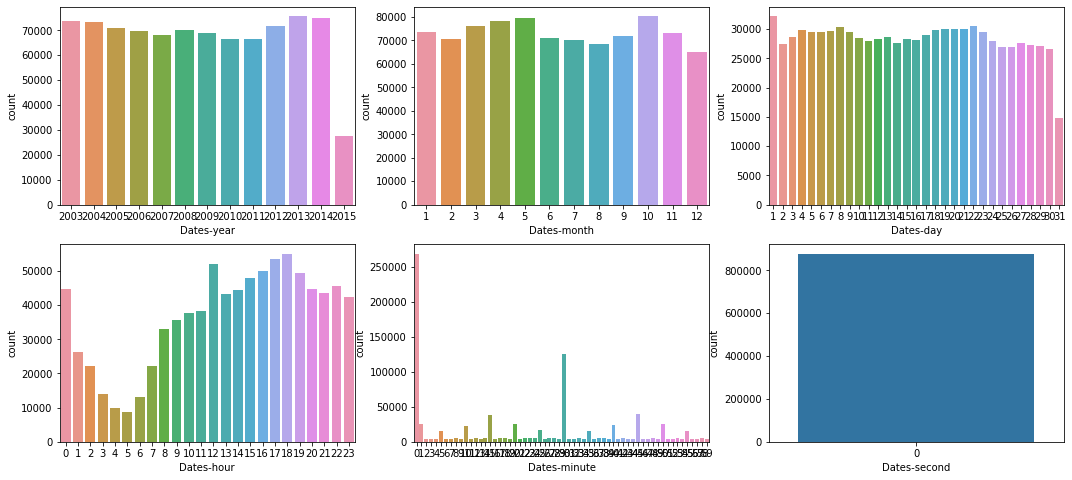

In [8]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 2x3으로 총 6개의 시각화를 한 화면에 띄웁니다.
#Q.이부분 왜 이렇게 쓰는지 질문해보기
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월, 일, 시, 분, 초 별 범죄의 발생 빈도를 출력합니다.
sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

몇몇 부분은 우리의 예상과 일치하지만, 몇몇 부분은 차이가 있는 것 같습니다. 하나하나 살펴보겠습니다.

### Q1-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**1. 분(```Dates-minute```), 초(```Dates-second```)는 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같다.**

초(```Dates-second```)는 우리의 예상과 일치하네요. 데이터가 전부 0으로 기록되어 있습니다. 그 뜻은, 초(```Dates-second```) feature로 넣어도 큰 의미가 없다고 해석할 수 있습니다.

하지만 분(```Dates-minute```)은 다릅니다. 범죄의 발생 빈도에 차이가 있고, 특이하게도 0분과 30분에 범죄가 빈번하게 발생합니다. 그 다음으로 순서대로 15분과 45분, 5분 10분 15분 20분 25분 등등으로 발생합니다. 이는 우리의 예상과 확연하게 다른 것 같습니다.

**2. 일(```Dates-day```) 31일을 제외하면 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같다.**

이는 시각화 결과와 일치합니다. 31일은 확실히 다른 날에 비해서 범죄가 절반 정도밖에 발생하지 않는 것 같습니다. 하지만 여기서도 특이한 사실을 알 수 있는데, 1일의 범죄 발생 빈도가 다른 날에 비해서 비약적으로 높습니다. 이는 우리의 예상과 다릅니다. 가령 어떤 범죄자, 내지는 어떤 범죄에 한정해서 1일에만 범죄가 빈번하게 발생한다? 라는 아이디어도 생각해 볼 수 있겠죠. (하지만 다소 납득하기 어려운 건 사실입니다)

**3. 시간(```Dates-hour```)은 범죄 발생 빈도에 큰 영향이 있을 것 같다.**

이는 시각화 결과와 일치합니다. 확실히 새벽에 범죄가 덜 발생하는 것 같고, 오후와 저녁에 범죄가 많이 발생하는 것 같습니다. 하지만 여기서도 신기한 사실은, 특이하게 0시와 12시에 범죄가 발생하는 빈도가 높은 것 같습니다. 이 점도 특이하다고 볼 수 있으며, 우리가 눈여겨봐야 하는 부분입니다.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다. 우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

### Q1-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.


1. 일단 초(```Dates-second```)는 전부 다 0으로 기록되어 있기 때문에, 범죄를 예측하는데 크게 중요하지 않을 것 같습니다. 그러므로 feature에서 제거하는 것도 좋은 아이디어 같습니다.
2. 다른 컬럼들, 특히나 시간(```Dates-hour```) 데이터는 예측 모델이 범죄를 예측하는데 큰 영향을 미칠 것 같습니다.
3. **<<여러분들이 스스로 고민한 뒤 아이디어를 적어주세요>>**

### A1-3) 
1. 5분단위로 범죄율의 변화가 있다면 ```Dates-minute``` feature을 5분단위로 체크해도 좋을 것 같습니다.
2. ```Dates-year```의 경우 2015년에만 변화가 있었으므로, 2015년에만 다른 부분을 알고리즘적으로 예외로 적용하거나 보완해주어야 할 것같습니다.
3. ```Dates-month```의 경우 중요한 feature가 아닌 듯 하니 범죄빈도 영향에 크게 중요하지 않을 것 같습니다. 하지만, 특정범죄가 특정 달에 일어나는 지등과 같은 이슈가 남아 있기 때문에 featrue에서 제거하기에는 아직 이릅니다.

### Review

분(```Dates-minute```)과 같은 기록이 잘 정리되지 않은 데이터는, 우리가 명시적으로 잘 정리하면 머신러닝 모델이 이 데이터를 이해하는 데 도움이 될 것 같다.

## X, Y

그 다음 분석하고 싶은 컬럼은 좌표 데이터입니다. [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 경진대회는 크게 두 가지 좌표 데이터가 있는데, 위도(Latitude)와 경도(Longitude)입니다. 데이터에서는 ```Y``` 컬럼이 위도를, ```X``` 컬럼이 경도를 나타냅니다. 이 정보는 범죄가 구체적으로 어떤 위치에서 발생했는지를 좌표로 찍어준거라고 볼 수 있습니다.

이런 좌표 정보를 시각화를 통해서 분석할 수 있는 가장 일반적인 방법은 seaborn의 [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)입니다. 이 기능을 활용해서 좌표 정보를 시각화해보겠습니다.

먼저 시각화하기 전에, 이 시각화가 어떤 그림이 나올지 상상해보겠습니다.

### Q2-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

  1. 일단 샌프란시스코의 좌표 데이터이기 때문에, 샌프란시스코의 지도와 유사한 그림이 나올 것으로 생각합니다.
  2. 하지만 현실세계의 데이터이기 때문에, 샌프란시스코 지도 외각으로 데이터의 분포와 동떨어진 아웃라이어(outlier)가 존재할 것 같습니다.
  3. 그리고 범죄의 종류(ex: 절도, 살인 등)와 관계 없이 범죄 자체가 아에 발생할 가능성이 낮은 지역에는 그림에서 공백으로 보일 것 같습니다.

자, 그럼 위 예상과 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

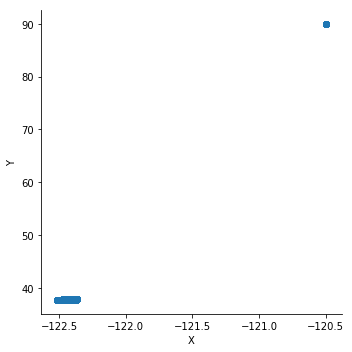

In [6]:
# seaborn의 lmplot을 사용해 좌표 데이터를 출력합니다.
# X축에는 경도(Longitude)를 나타내는 X를, Y축에는 위도(Latitude)를 나타내는 Y를 지정합니다.
# 그리고 추세선을 그리지 않기 위해(계산하는데 너무 느려서) fit_reg 옵션에 False를 주겠습니다.
sns.lmplot(data=train, x="X", y="Y", fit_reg=False)

결과를 보면 재미있는 현상을 발견할 수 있습니다.

기대했던 샌프란시스코 지도는 온데간데 없고, 좌표가 좌하단과 우상단에 몰려있는 현상을 발견할 수 있죠. 이는 우리가 기대한 결과와 다릅니다. 제 추측으로는, 시각화 결과의 좌하단에 위치한 점이나 우상단에 위치한 점, 둘 중 하나는 아웃라이어(outlier)인것 같습니다.

굳이 찍어보자면 둘 중 어느 부분이 아웃라이어일까요? 좌하단은 점이 약간 분산되어 있는 반면에, 우상단은 한 점으로 확실하게 몰려있는 것이 보입니다. 그러므로 저는 우상단이 아웃라이어라고 간주하고 이를 찾아보겠습니다.

In [7]:
# 경도(Longitude, X)와 위도(Latitude, Y)에서 가장 높은 값을 검색합니다.
# 이 점에 위치한 데이터가 아웃라이어(outlier)일 것으로 예상합니다.
train["X"].max(), train["Y"].max()

(-120.5, 90.0)

In [8]:
# 경도(X)가 아웃라이어(outlier)와 일치하면 True, 아니면 False인 결과를 가져옵니다.
# 이를 X_outliers라는 변수에 담습니다.
X_outliers = (train["X"] == train["X"].max())

# 위도(Y)가 아웃라이어(outlier)와 일치하면 True, 아니면 False인 결과를 가져옵니다.
# 이를 Y_outliers라는 변수에 담습니다.
Y_outliers = (train["Y"] == train["Y"].max())

# 경도(X)와 위도(Y)가 동시에 아웃라이어(outlier)인 데이터만 색인으로 가져옵니다.
# 이를 outlier라는 변수에 담습니다.
outlier = train[X_outliers & Y_outliers]

# outlier 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(outlier.shape)

# outlier 변수에 담긴 값을 출력합니다.
outlier

(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0
667042,2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.5,90.0,2005,11,28,16,4,0
669946,2005-11-14 09:20:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",YOSEMITE AV / WILLIAMS AV,-120.5,90.0,2005,11,14,9,20,0
671709,2005-11-02 20:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,CENTRAL,NONE,BRENHAM PL / WASHINGTON ST,-120.5,90.0,2005,11,2,20,30,0
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0,2005,10,23,20,0,0
673114,2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0,2005,10,23,18,11,0


확인 결과 총 67개의 아웃라이어를 발견했습니다.

67개라는 건 전체 데이터(878049)의 0.01%도 되지 않기 때문에, 이 아웃라이어를 개선하거나 해결한다고 머신러닝 알고리즘의 성능을 크게 끌어올리는 건 어려울 것 같습니다. 그러므로 이 부분은 저도 후순위로 미루겠습니다. (나중에 시간이 될 때 여러분들이 스스로 분석해보세요)

이번에는 아웃라이어를 제거한 좌표 데이터로 시각화를 해보겠습니다.

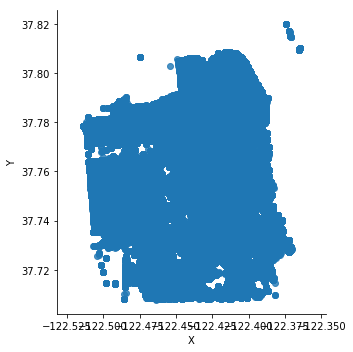

In [9]:
# 경도(X)와 위도(Y)가 동시에 아웃라이어(outlier)아 아닌(~) 데이터만 색인으로 가져옵니다.
# 이를 non_outliers라는 변수에 담습니다.
non_outliers = train[~(X_outliers & Y_outliers)]

# seaborn의 lmplot을 사용해 좌표 데이터를 출력합니다.
# X축에는 경도(Longitude)를 나타내는 X를, Y축에는 위도(Latitude)를 나타내는 Y를 지정합니다.
# 그리고 추세선을 그리지 않기 위해(계산하는데 너무 느려서) fit_reg 옵션에 False를 주겠습니다.
sns.lmplot(data=non_outliers, x="X", y="Y", fit_reg=False)

이제 원하는 그림(샌프란시스코 지도)이 나온 것을 확인할 수 있습니다.

### Q2-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**1. 샌프란시스코의 지도와 유사한 그림이 나올 것 같다.**

일단 아웃라이어(-120.5, 90)가 전체 분포와 너무 멀리 떨어져 있기 때문에, 좌표 데이터가 좌하단이나 우상단으로 쏠리는 문제가 있었습니다. 하지만 이 아웃라이어를 제거한 후 출력한 시각화는 예상대로 샌프란시스코 지도와 유사한 그림이 나오는 것을 확인할 수 있습니다.

**2. 샌프란시스코 지도 외각으로 데이터의 분포와 동떨어진 아웃라이어(outlier)가 존재할 것 같다.**

우리의 예상과 일치합니다. 다만 그 아웃라이어가 샌프란시스코 지역과 우상단쪽으로 크게 동떨어진 것이 특이한 점 같습니다.

**3.그리고 범죄의 종류(ex: 절도, 살인 등)와 관계 없이 범죄 자체가 아에 발생할 가능성이 낮은 지역에는 그림에서 공백으로 보일 것 같습니다.**

시각화 결과를 살펴보면 확실히 지도 내부에 공백이 있는 부분이 보이는 것 같습니다. 이런 면에서 우리의 예상이 일치하는 것 같아 보이기도 합니다. 다만 이는 범죄가 발생하지 않는 지역인지, 애초부터 범죄가 발생할 수 없는 지역(산, 호수, 공원 등)인지를 명확히 알아봐야 합니다. 이는 여러분들에게 맡기겠습니다.

### Q2-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 일단 아웃라이어가 전체 데이터의 0.01%도 되지 않기 때문에, 이 아웃라이어를 해결한다고 모델의 성능이 크게 좋아지지는 않을 것입니다.
2. 아직 범죄 종류(ex: 절도, 살인 등)마다의 좌표 데이터의 변화를 보지 못했지만, 만일 범죄 종류마다 좌표 데이터가 차이가 있다면(=특정 지역에서 많이 발생하는 범죄 등이 있다면) 이 데이터를 머신러닝 모델에 집어 넣으면 성능을 좋게 만들 수 있을 것 같습니다.
3. **<<여러분들이 스스로 고민한 뒤 아이디어를 적어주세요>>**

### A2-3) 
3. 만약에 샌프란시스코의 위,경도와 주소 데이터를 비교할 수 있는 자동화 옵션이 있다면 이를 통해서 필요없거나, 앞서 분석해본 아웃라이어 외에 주소 정보가 잘못 입력되어 있어 애초에 범죄가 발생할 수 없는 지역( 산, 호수 등)의 데이터들을 애초에 배제하고 시작하여 데이터 정확도를 높일 수 있을 것 같다.

### Review

아웃라이어가 존재한다면, 이를 정상적인 값으로 고치거나, 아니면 아예 아웃라이어를 배제하면 머신러닝 알고리즘이 아웃라이어에 편향되는 현상이 사라질 것이다.

## DayOfWeek

이번에 분석할 데이터는 요일(```DayOfWeek```) 컬럼입니다. 여기서부터는 제가 직접 하지 않고, 여러분들을 위한 과제로 제공하겠습니다. 앞서 ```Dates``` 컬럼과 ```X```, ```Y``` 컬럼을 EDA 했던 것 처럼, DayOfWeek도 직접 EDA 해보세요.

**힌트**

  * 시각화에서 큰 차이를 볼 수 없다면, Category(범죄 종류) 컬럼을 섞어서 시각화하면 좋은 힌트가 나올 수도 있습니다.

### Q3-1) DayOfWeek 컬럼을 시각화 하기 전에 어떤 그림이 나올 것으로 예상하시나요?

**주의**: 이 내용은 반드시 시각화를 하기 전에 작성하셔야 합니다. 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

  1. 미국의 경우, 주말에 유동인구가 많지 않은 편이다. 가족단위의 이동이 많지만, 대부분 집에서 시간을 보내거나 
     아울렛같은 큰 단위의 장소에 모여있기 때문에 주말보다는 주중에 범죄빈도가 더 높을 것이다.
  2. 금요일 저녁에 데이트 혹은 친구들과 시간을 보내는 일이 많기 때문에 금요일의 범죄빈도가 가장 높을 것이다.
  3. 범죄 빈도가 극명하게 차이나기 때문에 머신러닝 알고리즘 예측 모델에 정확도를 올릴 수 있는 중요한 지표가 될 것이다.


### Review

1. 몇몇 특정 범죄에 한해서, 주중일떄와 주말일 때 범죄 발생 횟수의 차이가 크게 날 것 같다. 
   아마도 주말일 때 범죄가 더 많이 발생할 것 같다.
2. 몇몇 범죄에 한정해서, 주중일때 더 많이 발생하는 범죄도 있을 것 같다.
3. 여기서 주말은 금토 일수도 있지만, 토일 일수도 있다.

### DayOfWeek 컬럼 시각화하기

        DayOfWeek
0       Wednesday
1       Wednesday
2       Wednesday
3       Wednesday
4       Wednesday
...           ...
878044     Monday
878045     Monday
878046     Monday
878047     Monday
878048     Monday

[878049 rows x 1 columns]


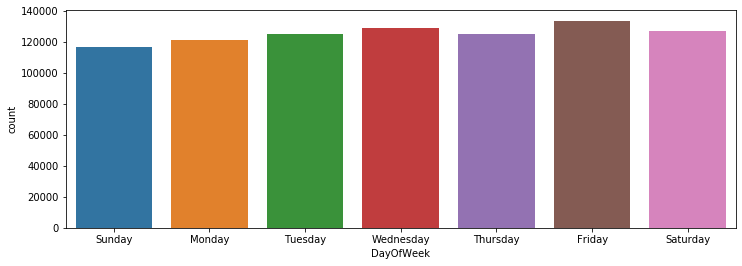

In [10]:
# ToDo: Write your code here!!

# 독립 Column이 존재하는지 파악.
train.head()
print(train[['DayOfWeek']])

#막대그래프로 표현해보기
#plt.subplots()
plt.figure(figsize = (12,4))

dayofweek_list = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
#요일 표시하기
sns.countplot(data=train, x="DayOfWeek", order = dayofweek_list)

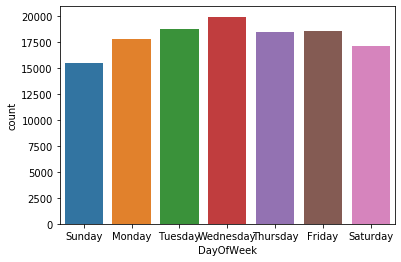

In [21]:
target = train[train["Category"]=="OTHER OFFENSES"]

sns.countplot(data = target, x = "DayOfWeek", order = dayofweek_list)

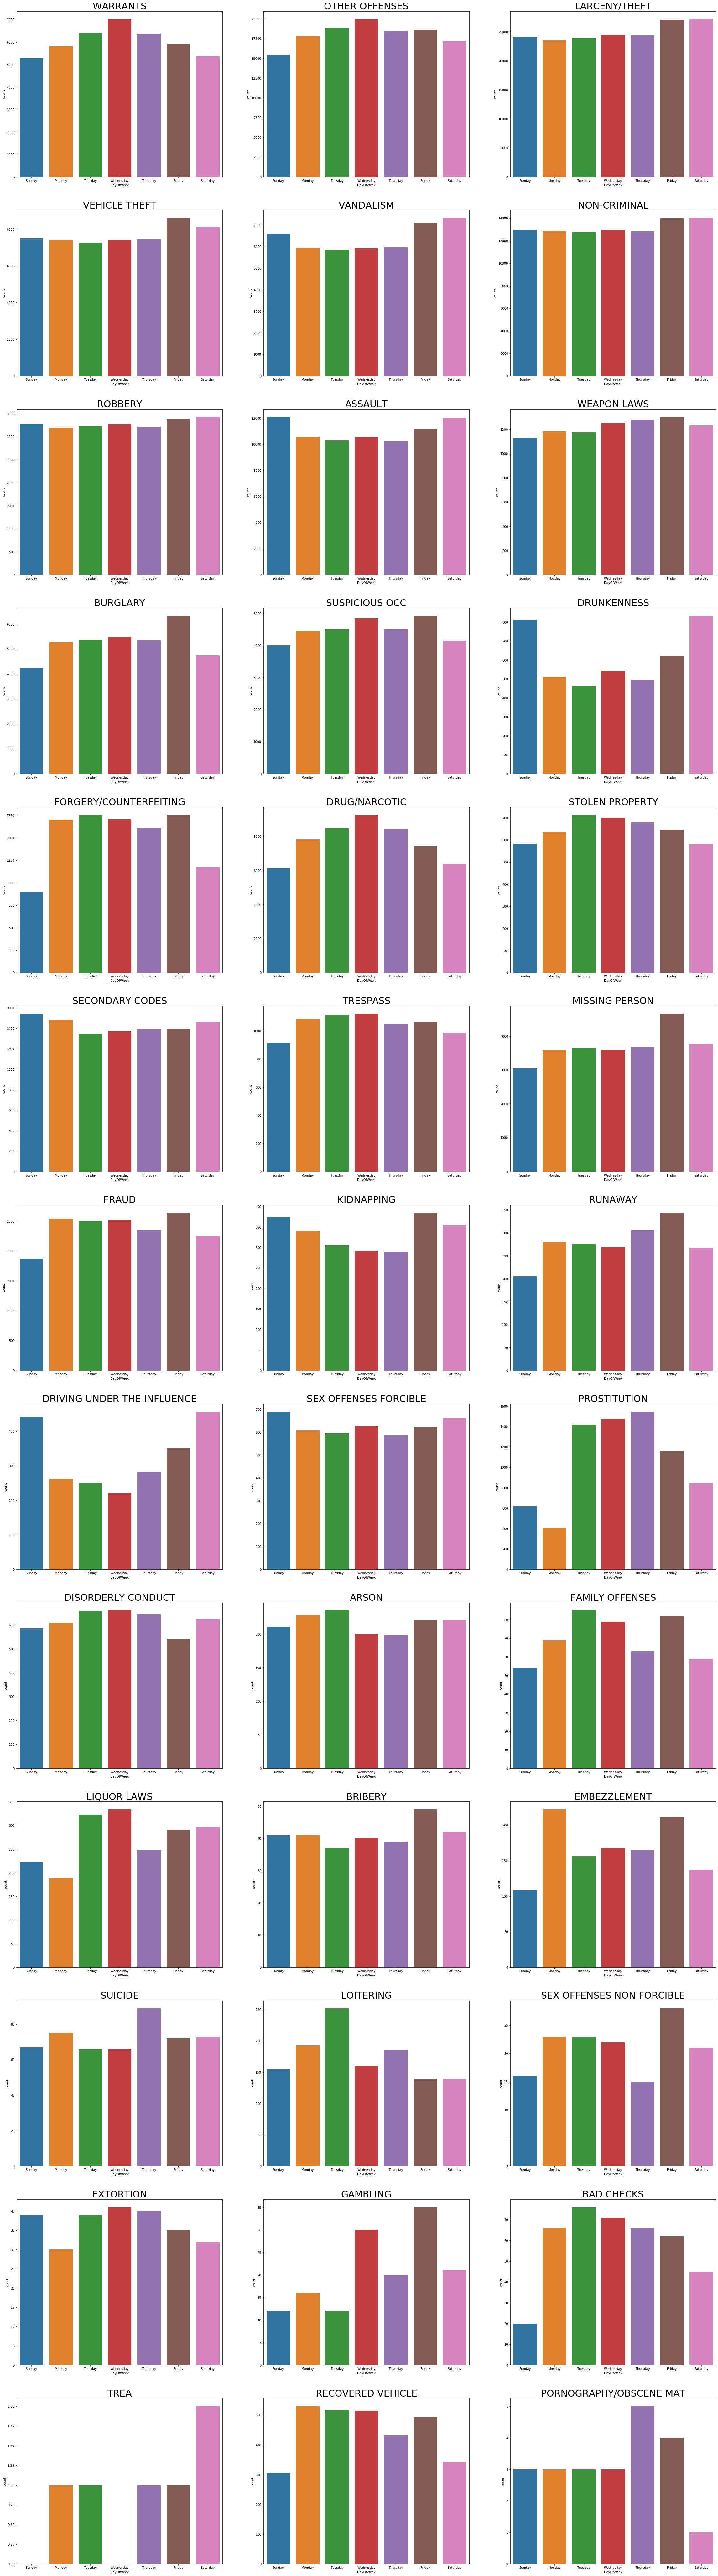

In [6]:
#과제 피드백 적용해보기 --> 특정 버죄가 
Cates = train["Category"].unique()
W_order =  ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

for i in range(len(Cates)):
    plt.subplot(13,3,i+1)
    a = train[train['Category'] ==Cates[i]] #왜 ==일까... 이게 의미하는바가 뭘까... 그냥 i 하면 안되는거.? 조건문인가?
    sns.countplot(data = a, x = 'DayOfWeek', order = W_order).set_title(Cates[i],fontsize=30)
plt.gcf().set_size_inches(40,150)

In [10]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

### Q3-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**1. 주말 중 일요일의 발생빈도가 역시 주중에 비해 가장 낮다. 
      일요일은 가족단위로 집에 있는 경우가 많아서 그럴 것 같다는 예상이 어느정도 맞는것 같다.

**2. 금요일의 범죄발생 빈도가 역시 가장 높았다. 금요일 밤에 음주를 즐기는 문화의 영향이 역시 큰 것 같다.

**3. 주말과 주중의 빈도 차가 클 것이라는 예상과 다르게, 전체적으로 큰 빈도수 차이를 보이지는 않는다. 
      예상했던 바와 다르게 알고리즘 예측도 향상에 아주 큰 지표가 되지는 않지 않을까.. 
      하지만 범죄 종류와 요일 데이터를 비교해보는 작업을 수행해봐야 정확하게 이 데이터의 효용성을 알 수 있을 것 같다.

### Q3-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 범죄빈도가 큰 차이가 나지는 않지만, 범죄 종류 데이터와 비교해봤을 때, 
   요일별 혹은 주중/주말별로 자주 발생하는 범죄 종류가 있는지 확인해볼 필요가 있다.
2. 금요일에 가장 많이 일어나는 범죄가 강력범죄인지 확인하고, 중요도를 높여놔야하지 않을까
3. 요일데이터 자체만으론 범죄예측을 하는데 큰 도움이 되지는 않을 것 같다. 
   범죄 종류 데이터와 합쳐져서 시너지를 낼 수 있게끔 해야 하겠다,

## PdDistrict
이번에 분석할 데이터는 관할 경찰서(PdDistrict) 컬럼입니다. 이 컬럼도 제가 직접 하지 않고 여러분들에게 과제로 제공하겠습니다. 앞서 Dates 컬럼과 X, Y 컬럼을 EDA 했던 것 처럼, PdDistrict도 직접 EDA 해보세요.

### Q4-1) PdDistrict 컬럼을 시각화 하기 전에 어떤 그림이 나올 것으로 예상하시나요?

**주의**: 이 내용은 반드시 시각화를 하기 전에 작성하셔야 합니다. 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 특정 구역의 PdDistrict가 압도적인 높이를 기록하고 있을 것 같다. (ex. 빈촌 관할 >>> 부촌 관할)
2. 위의 결과 때문에 데이터 불균형이 심하게 나타날 것 같다.
3. 관할구역이 겹쳐서, 공동 수사를 했거나, 혹은 공조를 한 곳들의 데이터는 중복해서 나오지 않을까..?

### PdDistrict 컬럼 시각화하기

       PdDistrict
0        NORTHERN
1        NORTHERN
2        NORTHERN
3        NORTHERN
4            PARK
...           ...
878044    TARAVAL
878045  INGLESIDE
878046   SOUTHERN
878047   SOUTHERN
878048    BAYVIEW

[878049 rows x 1 columns]


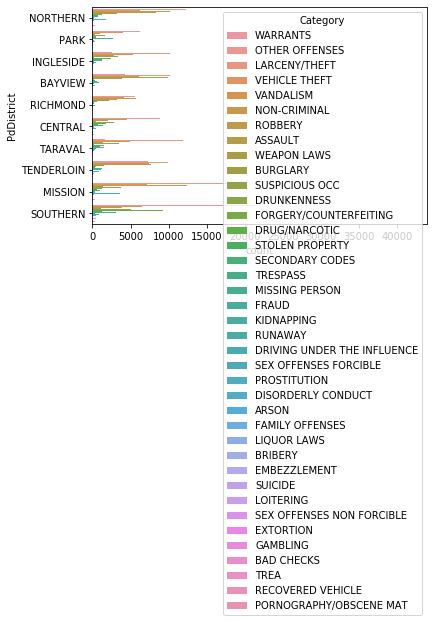

In [13]:
# ToDo: Write your code here!!

#독립 Column이 존재하는 지 파악.
train.head()
print(train[['PdDistrict']])

#막대그래프로 표현해보기
plt.subplots()

#PdDistrict별 범죄빈도 표현해보기
#pddistrict = sns.countplot(data=train, y="PdDistrict")

#PdDistrict + Category 합쳐서 범죄 빈도.
pd_category = sns.countplot(data=train, y="PdDistrict", hue = "Category")

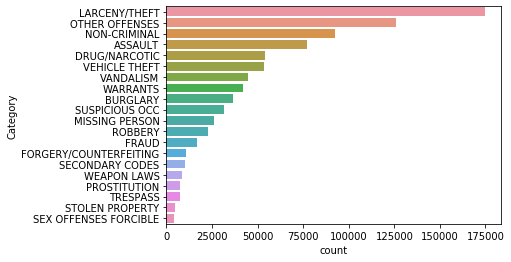

In [16]:
# 과제 피드백 자료 실습
# 횟수가 많은 범죄 유형 Top 20개만 시각화

figure.set_size_inches(16,12)
sns.countplot(data = train, y="Category", order = train.Category.value_counts().index[:20])

In [ ]:
#top 10 범죄 유형만을 대상으로 각 구역별로 순위
#catplot 함수 이용해보기

top10 = train.Category.value_counts().index[:10]
train_top10 = train.loc[train.Category.isin(top10)]

# 통합 범죄 발생이 많은 구역 순으로 정렬함
# train.PdDistrict.value_counts().index
sns.catplot

### Q3-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?
**1. 예상대로 SOUTHERN이라는 특정 구역이 타 구역보다 압도적으로 높은 빈도를 자랑하고 있다. 
     역시 지역 특성에 따라 범죄 빈도가 다르다는 것을 알 수 있다.

**2. 데이터 불균형이 심할 것이라고 예상했지만, 아주 심각할정도로 불균형이 심하지는 않은 것 같다. 
     가장 낮은 RICHMOND와 가장 높은 SOUTHERN의 데이터 차이가 1.5배정도 난다.

**3. 이 그래프만 가지고는 공조하거나, 관할 구역이 겹치는 부분의 중복 포함 여부는 확인할 수가 없다.

### Q4-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.¶

1. 관할구역을 지도API, 좌표데이터와 합쳐 빈도 파악 시각화에 좀 더 도움이 될 수 있을 것이다.
1. 관할구역 범죄 빈도와 관할구역별 범죄종류 데이터를 합쳐야 아마 지역별 특정 범죄 빈도 파악을 더 잘 할 수 있을 것이다.
1. 관할구역이 겹치거나, 애매한 경우에 샌프란시스코에서는 이를 어떻게 처리하는 지 알아서 알고리즘에 적용해야 할 것이다.

## 나머지 데이터를 시각화를 통해 더 분석하기

지금까지 분석한 결과 외에도 다양한 방식으로 데이터를 분석하거나 시각화하여 데이터를 더 깊게 이해할려는 시도를 할 수 있습니다. 특히나 (힌트를 드리자면) ```Category``` 컬럼과 ```Address``` 컬럼을 잘 이해하는 것이 [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 경진대회에서 좋은 등수를 올릴 수 있는 핵심입니다.

그런 관점에서, 위에서 주워진 형식에 구애받지 않고 자유롭게 데이터를 분석하고 시각화해보세요. 분석하거나 시각화 할 때 다음의 링크를 참고하는 걸 추천드립니다.

* Mapping and Visualizing Violent Crime. ([링크](https://www.kaggle.com/mircat/violent-crime-mapping), [자료](https://www.kaggleusercontent.com/kf/144822/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..f18gU6H9MwiocQzte1wYUA.4n2GyIh6jZhkBR7iCLgiOBoRkuc4rvKZCyHpLWqaN-VYAckpd9DhvGmebkOLz4nJARW5m1ZY0aAp-1B9KKjiT66Y8CjpkWIhBavo0YQxx6Wfa_Uz-BmGzB9FsiTGT2ypT5hE_ns0SQQYPLh6ulXlfw.EGXnmo9w1gATD0AkT5X1WQ/output.html))
* Crime density by location. ([링크](https://www.kaggle.com/dbennett/test-map))
* White-Collar vs. Blue-Collar Crime in SF. ([링크](https://www.kaggle.com/ampaho/white-collar-vs-blue-collar-crime-in-sf))
* Histograms of Crime by Day/District/Year. ([링크](https://www.kaggle.com/petercooman/histograms-of-crime-category-by-day))
* Top Crimes Zones. [링크](https://www.kaggle.com/sanghan/top-crimes-zones)
* Vehicle Thefts or Jerry Rice Jubilation?. [링크](https://www.kaggle.com/eyecjay/vehicle-thefts-or-jerry-rice-jubilation/output), [자료](https://www.kaggleusercontent.com/kf/18658/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..pbs95iVw0JCyvqI1Bx7Dow.y_q4Ttp_RJ6y1IqZjgiS19Tim_UhjIbpHfXNRA5MMQr6-INsupTZXJWuLwX-SXDPYacCHD6UM7eA-DfaddOdSgLwPkQWtpEW8yWnfSmnWyIpWld7XHqa5rPsQ7GhjzITDjMrzIwFAvui3NsyPZbrUgAyhcDHKnC1Ye5l8uefGbg.a9MmwpxVypr0vRB9wSjZYA/output.html)
* San Francisco Crime Classification. [링크](https://cseweb.ucsd.edu/classes/wi17/cse258-a/reports/a031.pdf)
* San Francisco crime classification: Descriptive, Predictive, and Prescriptive analysis.  [링크](https://medium.com/@m.vkumar89/san-francisco-spatial-data-research-for-crime-classification-1a6f1c1b7d09)
* My entry to the Kaggle SF crime classification competition using Apache Spark. [링크](http://benfradet.github.io/blog/2016/06/08/SF-crime-classification-with-Apache-Spark)

## 제출

과제를 다 끝내셨으면 http://bit.ly/ds-assignment 에서 안내에 따라 과제를 제출하여 주세요! 과제를 제출해주시면 검토 결과를 드립니다. 다음 Level에서 과제 내용을 다루기 때문에 솔루션은 따로 제공해드리지 않습니다.

수업이나 과제 관련 질문, 수료증 문의 등은 담당 튜터(조교)에게 문의 주세요. 영수증 발급 등의 문의는 support@dsschool.co.kr 로 메일 주시면 담당자분이 응대해주실 겁니다. 기타 궁금한 사항은 슬랙으로 문의 주세요!

기존의 라이브북 시스템을 이용하고 계신 수강생분들도 곧바로 슬랙으로 초대해드리겠습니다.